# Diamond EP Resolution LDA v.2#

Previously LDA had little to no success in separating success from failure, or even high from low sucess rate spacegroups. In this notebook, the same analysis will be repeated in each spacegroup cluster.

The data and models are first prepared.

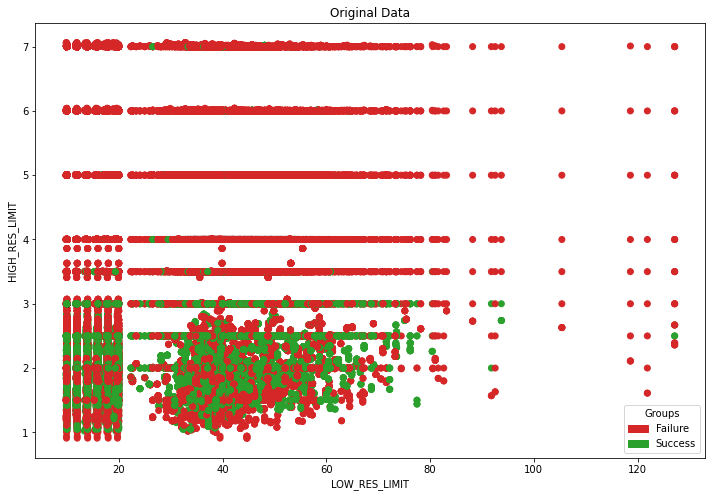

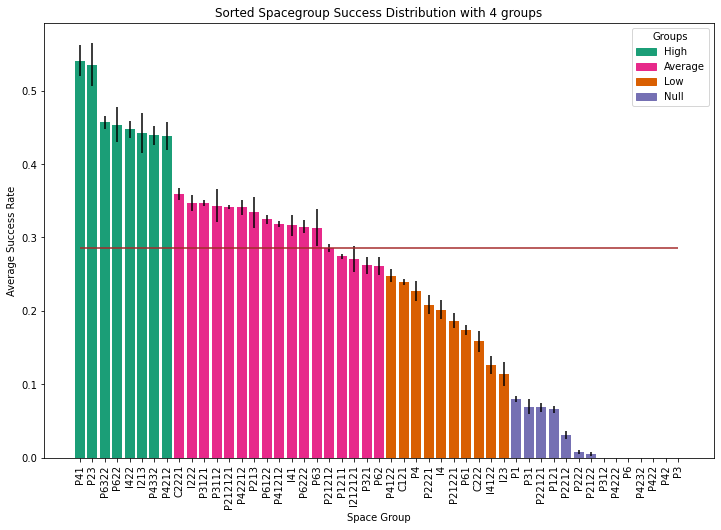

In [1]:
import sys
dirpath = r'C:\Users\César\PycharmProjects\Diamond_ML'
if dirpath not in sys.path:
    sys.path.insert(0, dirpath)
from read_data import x, y, union, pd, np, plt, plot_original_data
from grouping import cluster_spacegroups, avg_success_bar_plot
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, StandardScaler
from sklearn.pipeline import Pipeline
from pca import pca


# get spacegroup clusters
n = 4
model, pred, agg_sorted = cluster_spacegroups(union, n)

# show original data and bar plot
def_x_plot, def_y_plot = "LOW_RES_LIMIT", "HIGH_RES_LIMIT"
plot_original_data(def_x_plot, def_y_plot, x, y, figsize=(12, 8))
avg_success_bar_plot(agg_sorted, y, pred)

# create pipeline
pipe_lda = Pipeline([("scaler", StandardScaler()),
                     ("lda", LinearDiscriminantAnalysis())])
lda = pipe_lda["lda"]
pipe_pca = pca()


# group spacegroup clusters
cats = pred.replace(pred.drop_duplicates().values, ["high", "average", "low", "null"])
union_dummy = union.copy()
union_dummy["CLUSTER"] = union["SPACEGROUP"].map(cats)
clusters = {i.title(): (union_dummy[union_dummy["CLUSTER"]==i].drop(["CLUSTER", "IS_SUCCESS"], axis=1),
                y[union_dummy["CLUSTER"]==i]) for i in cats.drop_duplicates()}

Then LDA/PCA is analysed within each spacegroup cluster.

--------------------
High


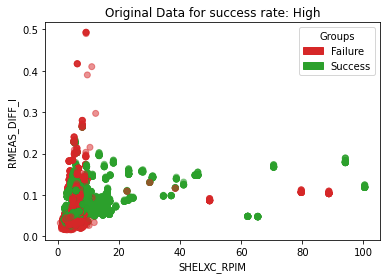

LDA


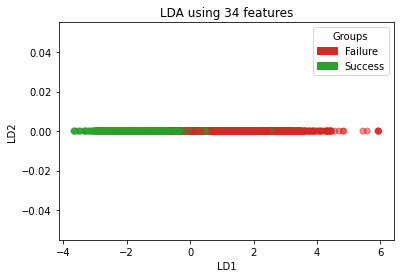

SHELXC_RANOM                 519.087390
SHELXC_RPIM                  518.271562
RMEAS_I                       22.317775
RMERGE_I                      20.439559
SHELXC_I_SIGMA                 6.330702
HIGH_RES_LIMIT                 5.066160
RMEAS_DIFF_I                   4.512098
I_SIGMA                        4.343390
RPIM_I                         4.133486
SHELXC_SIGNAL                  3.486236
RMERGE_DIFF_I                  3.228852
ANOMALOUS_SLOPE                2.381158
ANOMALOUS_CORRELATION          1.448555
SHELXC_RESOLUTION              1.376194
DIFF_I                         1.241508
TOTAL_UNIQUE_OBSERVATIONS      1.011678
SHELXC_MULTIPLICITY            0.920133
RPIM_DIFF_I                    0.824248
CC_HALF                        0.754241
TOT_MOLWEIGHT                  0.736272
TOTAL_OBSERVATIONS             0.514006
NUMBER_SITES                   0.435000
MULTIPLICITY                   0.411345
SOLVENT_CONTENT                0.394213
SHELXC_N_DATA                  0.383603


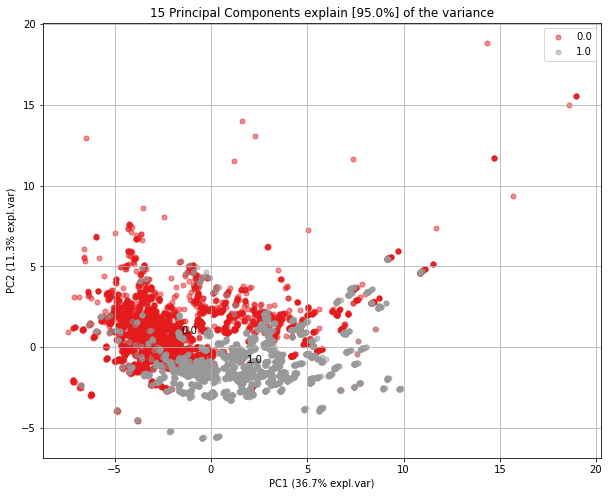

      PC                    feature   loading  type
0    PC1                RPIM_DIFF_I  0.255929  best
1    PC2          SHELXC_RESOLUTION  0.307511  best
2    PC3     ANOMALOUS_MULTIPLICITY  0.399806  best
3    PC4      ANOMALOUS_CORRELATION  0.328615  best
4    PC5              TOT_MOLWEIGHT  0.537083  best
5    PC6               COMPLETENESS -0.523021  best
6    PC7               SHELXC_RANOM  0.428059  best
7    PC8            SOLVENT_CONTENT -0.652524  best
8    PC9              LOW_RES_LIMIT -0.903646  best
9   PC10                        F''  0.650881  best
10  PC11  TOTAL_UNIQUE_OBSERVATIONS  0.400058  best
11  PC12                 DATASET_id -0.568961  best
12  PC13        SHELXC_COMPLETENESS -0.680231  best
13  PC14             SHELXC_I_SIGMA -0.412513  best
14  PC15                    CC_HALF  0.442074  best
15  PC16                    CC_HALF -0.489179  best
16  PC17        SHELXC_MULTIPLICITY  0.490235  best
17  PC18               COMPLETENESS -0.496013  best
18  PC19    

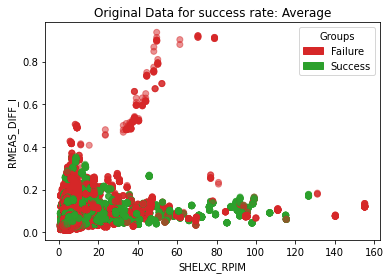

LDA


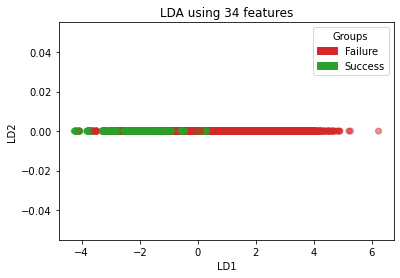

SHELXC_RPIM                  99.580936
SHELXC_RANOM                 99.541370
RMEAS_DIFF_I                 11.405832
RMERGE_DIFF_I                 7.311593
RPIM_DIFF_I                   3.127049
DIFF_F                        2.037389
HIGH_RES_LIMIT                1.602608
ANOMALOUS_SLOPE               1.476021
I_SIGMA                       1.383247
SHELXC_SIGNAL                 1.329606
SHELXC_I_SIGMA                1.167009
RMEAS_I                       1.065137
TOT_MOLWEIGHT                 0.936815
MULTIPLICITY                  0.883810
RPIM_I                        0.831158
NUMBER_SITES                  0.808177
ANOMALOUS_MULTIPLICITY        0.740083
TOTAL_OBSERVATIONS            0.604279
ANOMALOUS_COMPLETENESS        0.541253
RMERGE_I                      0.521119
CC_HALF                       0.464693
SHELXC_CFOM                   0.445685
DIFF_I                        0.436169
SHELXC_N_DATA                 0.432528
COMPLETENESS                  0.279516
TOTAL_UNIQUE_OBSERVATIONS

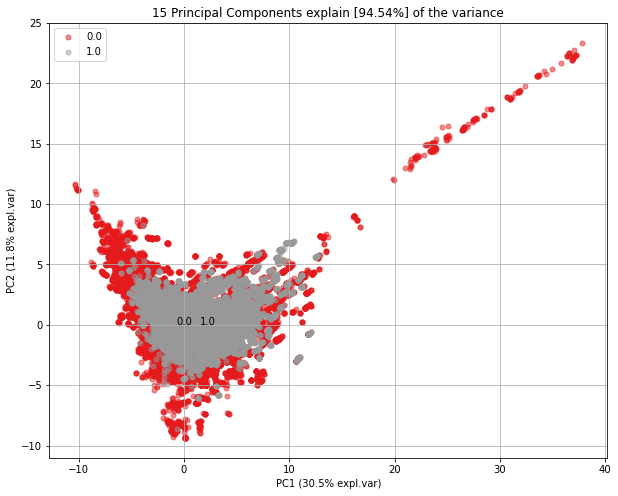

      PC                    feature   loading  type
0    PC1                RPIM_DIFF_I  0.280676  best
1    PC2     ANOMALOUS_MULTIPLICITY  0.341190  best
2    PC3        SHELXC_MULTIPLICITY -0.348620  best
3    PC4      ANOMALOUS_CORRELATION  0.326636  best
4    PC5              TOT_MOLWEIGHT -0.469724  best
5    PC6     ANOMALOUS_MULTIPLICITY -0.389744  best
6    PC7                SHELXC_RPIM  0.444402  best
7    PC8            SOLVENT_CONTENT  0.752678  best
8    PC9              LOW_RES_LIMIT  0.943431  best
9   PC10                 DATASET_id -0.554960  best
10  PC11                        F''  0.709108  best
11  PC12                        F'' -0.482944  best
12  PC13                    CC_HALF -0.484855  best
13  PC14      ANOMALOUS_CORRELATION  0.387316  best
14  PC15        SHELXC_COMPLETENESS -0.617323  best
15  PC15             HIGH_RES_LIMIT -0.367901  weak
16   PC6               COMPLETENESS  0.281599  weak
17   PC6               MULTIPLICITY -0.385120  weak
18  PC14    

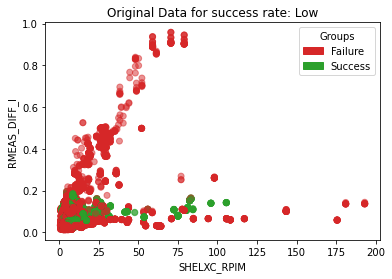

LDA


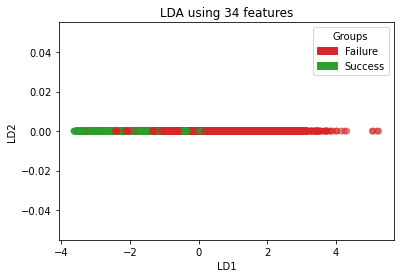

SHELXC_RANOM                 197.045418
SHELXC_RPIM                  197.002455
RMERGE_DIFF_I                 10.412184
RMEAS_DIFF_I                   5.769906
RMEAS_I                        4.867818
RPIM_DIFF_I                    4.026737
RPIM_I                         3.967662
ANOMALOUS_SLOPE                1.895158
ANOMALOUS_MULTIPLICITY         1.771550
HIGH_RES_LIMIT                 1.687585
SHELXC_SIGNAL                  1.645708
MULTIPLICITY                   1.411267
NUMBER_SITES                   1.200841
TOT_MOLWEIGHT                  0.977843
DIFF_F                         0.859682
CC_HALF                        0.747321
RMERGE_I                       0.736226
SHELXC_CFOM                    0.705292
ANOMALOUS_COMPLETENESS         0.643964
SHELXC_I_SIGMA                 0.515206
COMPLETENESS                   0.495281
SHELXC_N_DATA                  0.459824
TOTAL_UNIQUE_OBSERVATIONS      0.377906
SOLVENT_CONTENT                0.262347
SHELXC_COMPLETENESS            0.214465


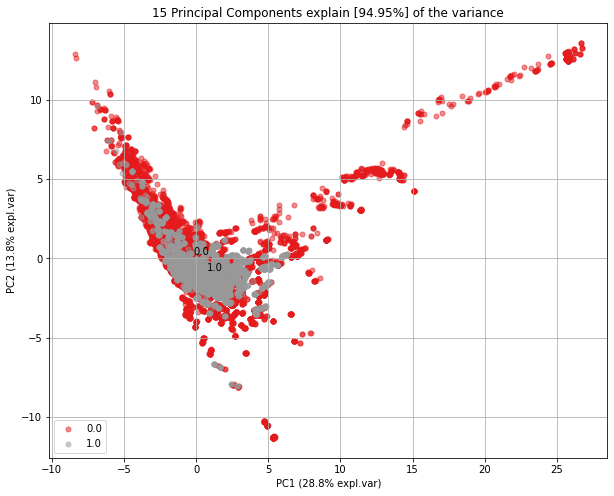

      PC                    feature   loading  type
0    PC1                RPIM_DIFF_I  0.296317  best
1    PC2                     DIFF_I  0.297595  best
2    PC3               MULTIPLICITY -0.333341  best
3    PC4               NUMBER_SITES  0.320248  best
4    PC5               SHELXC_RANOM  0.436503  best
5    PC6     ANOMALOUS_MULTIPLICITY  0.425114  best
6    PC7               SHELXC_RANOM  0.423765  best
7    PC8                 DATASET_id  0.772671  best
8    PC9            SOLVENT_CONTENT  0.865815  best
9   PC10              LOW_RES_LIMIT  0.933066  best
10  PC11                SHELXC_CFOM -0.460108  best
11  PC12                        F''  0.668882  best
12  PC13                SHELXC_CFOM  0.633885  best
13  PC14             SHELXC_I_SIGMA  0.546896  best
14  PC15        SHELXC_COMPLETENESS -0.644103  best
15  PC15             HIGH_RES_LIMIT -0.339613  weak
16   PC7               COMPLETENESS  0.344545  weak
17  PC14                    I_SIGMA  0.402362  weak
18   PC1    

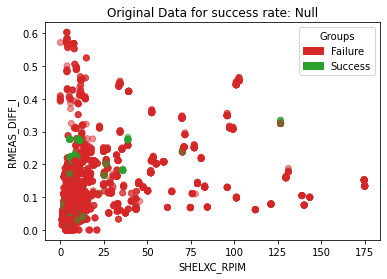

LDA


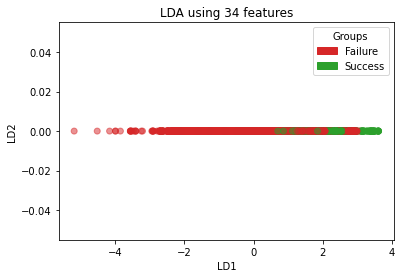

SHELXC_RPIM                  964.095060
SHELXC_RANOM                 963.894962
RMEAS_I                       26.352922
RMERGE_I                      18.941554
RMEAS_DIFF_I                  11.239024
RPIM_DIFF_I                    9.576055
RPIM_I                         7.264596
MULTIPLICITY                   2.080728
ANOMALOUS_MULTIPLICITY         2.011842
ANOMALOUS_COMPLETENESS         1.827642
HIGH_RES_LIMIT                 1.765838
RMERGE_DIFF_I                  1.693183
COMPLETENESS                   1.366792
SHELXC_I_SIGMA                 1.131397
NUMBER_SITES                   1.070293
CC_HALF                        1.067291
TOTAL_UNIQUE_OBSERVATIONS      1.039466
DIFF_F                         1.003184
DIFF_I                         0.973354
SHELXC_CFOM                    0.846335
TOT_MOLWEIGHT                  0.835505
TOTAL_OBSERVATIONS             0.763768
ANOMALOUS_SLOPE                0.581865
I_SIGMA                        0.540383
SOLVENT_CONTENT                0.510889


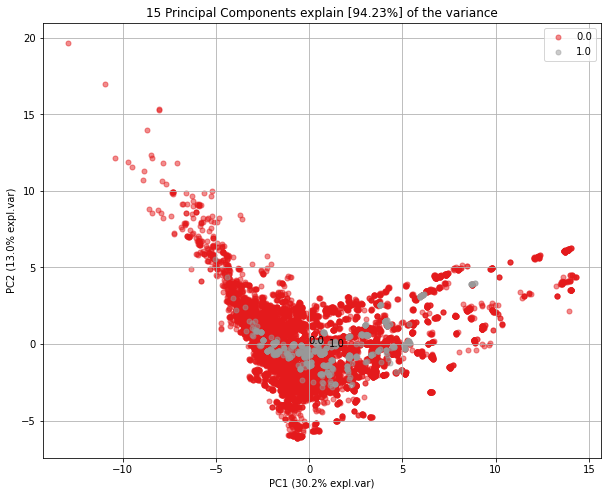

      PC                    feature   loading  type
0    PC1                RPIM_DIFF_I  0.281662  best
1    PC2               MULTIPLICITY  0.355340  best
2    PC3        SHELXC_MULTIPLICITY -0.373144  best
3    PC4               COMPLETENESS -0.388517  best
4    PC5               NUMBER_SITES  0.420769  best
5    PC6               MULTIPLICITY  0.429383  best
6    PC7                        F'' -0.394798  best
7    PC8                 DATASET_id  0.591190  best
8    PC9            SOLVENT_CONTENT -0.769699  best
9   PC10              LOW_RES_LIMIT -0.699418  best
10  PC11                        F'' -0.493317  best
11  PC12                        F''  0.656661  best
12  PC13                 DATASET_id  0.569717  best
13  PC14          SHELXC_RESOLUTION -0.431415  best
14  PC15        SHELXC_MULTIPLICITY -0.688981  best
15   PC5             HIGH_RES_LIMIT  0.248758  weak
16  PC14                    I_SIGMA  0.311892  weak
17   PC1                   RMERGE_I  0.263575  weak
18   PC1    

In [2]:
# go through each spacegroup cluster
for cat_cluster, (x_clt, y_clt) in clusters.items():
    alpha = .5
    print("--------------------", cat_cluster, sep="\n")
    (fig, ax), (cmap, c, patches) = plot_original_data("SHELXC_RPIM", "RMEAS_DIFF_I", x_clt, y_clt, alpha=alpha, show=False)
    ax.set_title(f"Original Data for success rate: {cat_cluster}")
    ax.set_alpha(alpha)
    plt.show()

    for pipe, name in [(pipe_lda, "lda"), (pipe_pca, "pca")]:
        # fit to data
        X = x_clt.drop("SPACEGROUP", axis=1)
        if name == "pca":
            print("PCA")
            X_scaled = StandardScaler().fit_transform(X)
            X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
        x_new = pipe.fit_transform(X, y_clt)

        if name == "lda":
            print("LDA")
            # plot LD1 vs LD2
            fig, ax = plt.subplots()
            ax.scatter(x_new, np.zeros_like(x_new), c=c, alpha=alpha)
            ax.legend(handles=patches, title="Groups")
            ax.set_xlabel("LD1")
            ax.set_ylabel("LD2")
            ax.set_title(f"LDA using {X.shape[1]} features")
            plt.show()
            
            # use coefficients for feature importance
            coefs = pd.Series(np.abs(pipe[name].coef_).sum(axis=0), index=X.columns, name="coefficients")
            sorted_abs_coef = coefs.sort_values(key=lambda a: abs(a), ascending=False)
            print(sorted_abs_coef)

        elif name == "pca":
            # plot PC1 vs PC2
            pipe.scatter(alpha_transparency=alpha, y=y_clt)
            plt.show()
            print(x_new["topfeat"])


        # show results
        #plt.show()

LDA does a better job of separating success from failure now than when the whole data was considered at once. PCA results are similar to those previously found - clusters are present, but they overlap significantly.

- For **high success rate**, LDA results in a **clear separation**.
- Clarity of LDA separation decreases as the average success rate decreases, but success clusters can be seen throughout.
- **SHELXC RANOM/RPIM** (highly inter-correlated) are the dominant LDA features in every spacegroup cluster, followed by **RMEAS/RMERGE/RPIM (DIFF) I**.
- **High resolution limit**, **anomalous slope** and **DIFF I** are also frequently high up on the table.

The previously done K Neighbors test using no transforming/LDA/PCA can once more be attempted for every spacegroup cluster.

--------------------
High
Test ratio: 25.01 - True
Total 1-0 label ratio: 45.74
Train 1-0 label ratio: 45.42 - False
Test 1-0 label ratio: 46.72 - False
--------------------------------


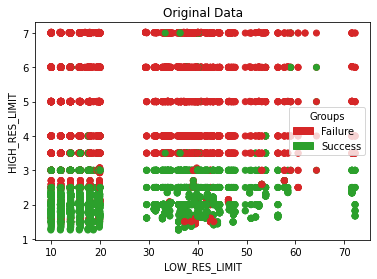

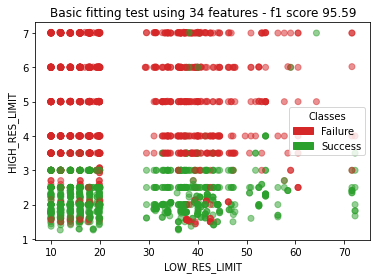

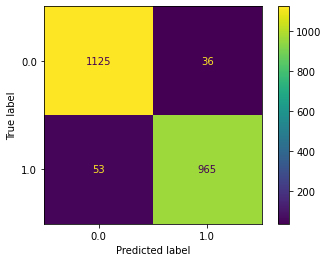

Basic:
    Accuracy: 95.92
    Precision: 96.4
    Recall: 94.79
    F1: 95.59


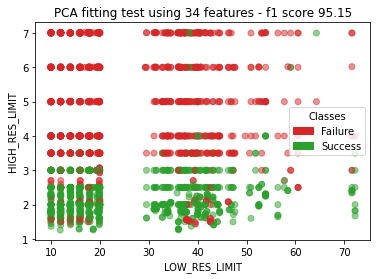

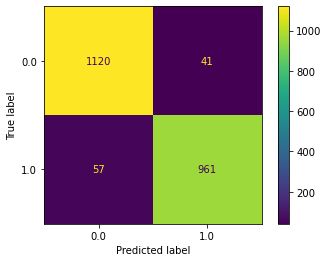

PCA:
    Accuracy: 95.5
    Precision: 95.91
    Recall: 94.4
    F1: 95.15


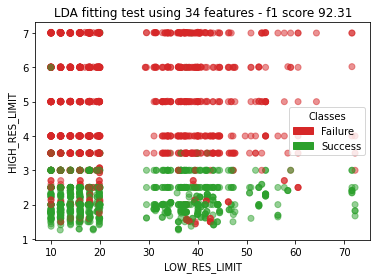

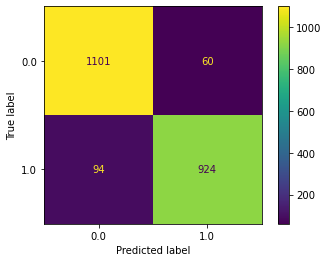

LDA:
    Accuracy: 92.93
    Precision: 93.9
    Recall: 90.77
    F1: 92.31
--------------------------------
--------------------
Average
Test ratio: 25.0 - True
Total 1-0 label ratio: 31.94
Train 1-0 label ratio: 31.86 - False
Test 1-0 label ratio: 32.16 - False
--------------------------------


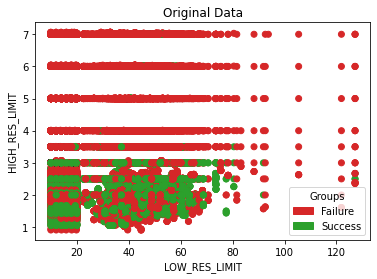

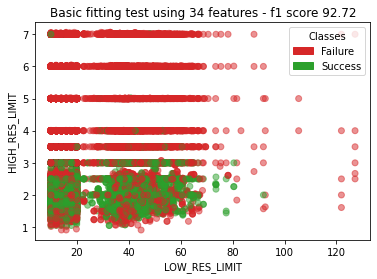

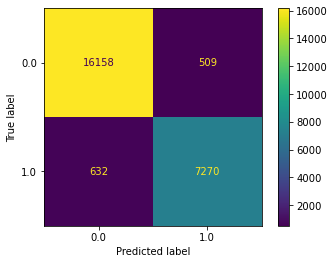

Basic:
    Accuracy: 95.36
    Precision: 93.46
    Recall: 92.0
    F1: 92.72


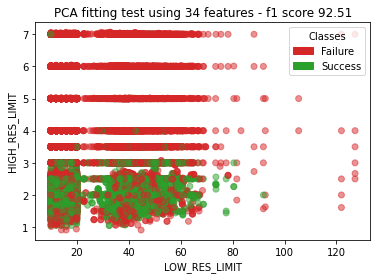

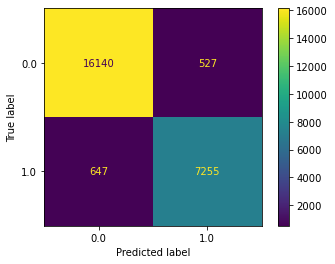

PCA:
    Accuracy: 95.22
    Precision: 93.23
    Recall: 91.81
    F1: 92.51


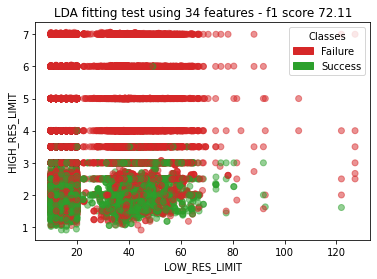

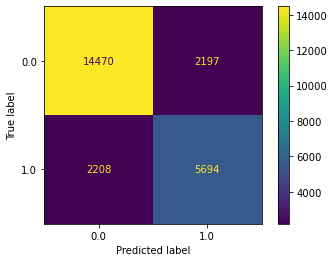

LDA:
    Accuracy: 82.07
    Precision: 72.16
    Recall: 72.06
    F1: 72.11
--------------------------------
--------------------
Low
Test ratio: 25.0 - True
Total 1-0 label ratio: 21.65
Train 1-0 label ratio: 21.83 - False
Test 1-0 label ratio: 21.12 - False
--------------------------------


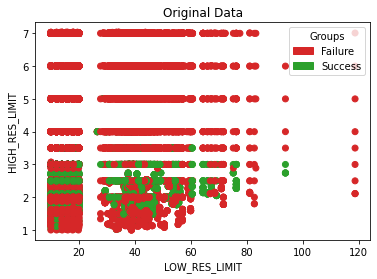

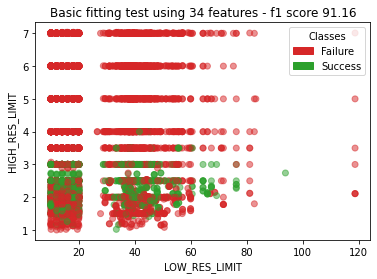

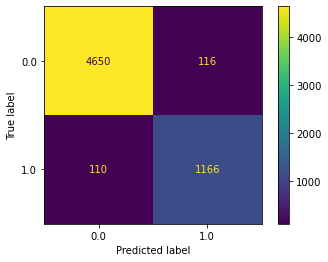

Basic:
    Accuracy: 96.26
    Precision: 90.95
    Recall: 91.38
    F1: 91.16


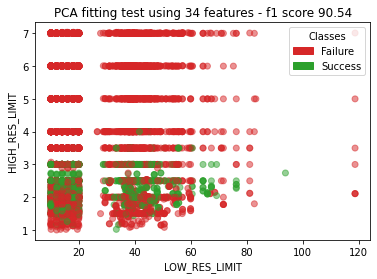

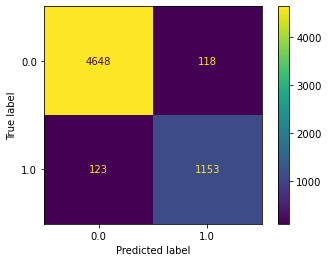

PCA:
    Accuracy: 96.01
    Precision: 90.72
    Recall: 90.36
    F1: 90.54


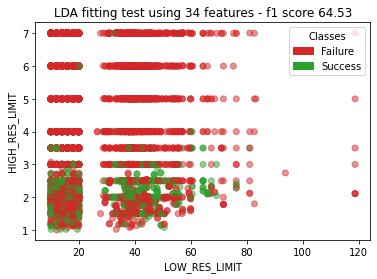

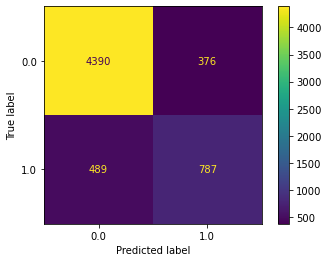

LDA:
    Accuracy: 85.68
    Precision: 67.67
    Recall: 61.68
    F1: 64.53
--------------------------------
--------------------
Null
Test ratio: 25.01 - True
Total 1-0 label ratio: 5.75
Train 1-0 label ratio: 5.94 - False
Test 1-0 label ratio: 5.17 - False
--------------------------------


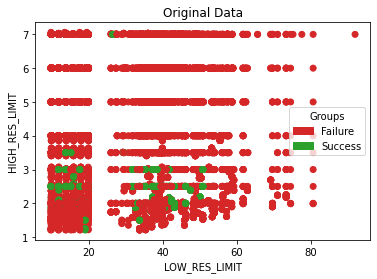

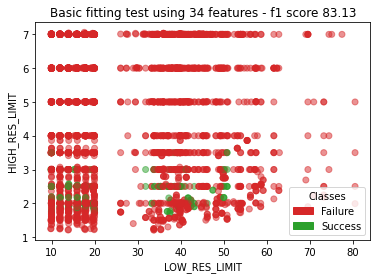

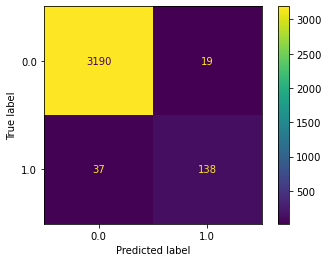

Basic:
    Accuracy: 98.35
    Precision: 87.9
    Recall: 78.86
    F1: 83.13


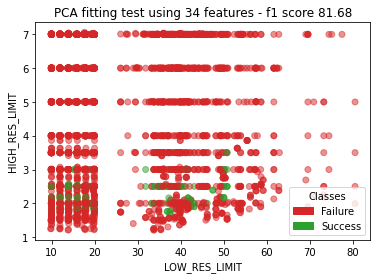

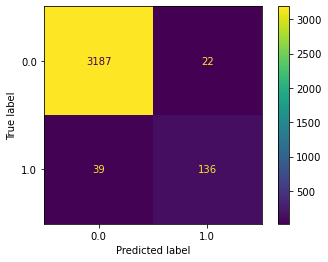

PCA:
    Accuracy: 98.2
    Precision: 86.08
    Recall: 77.71
    F1: 81.68


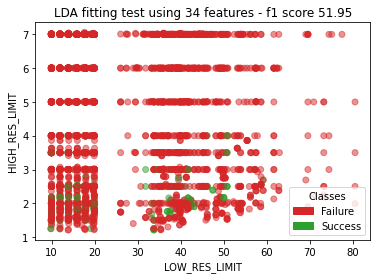

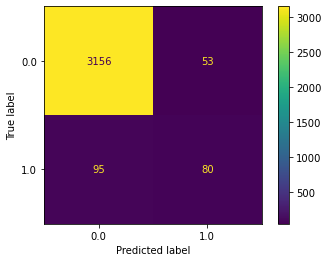

LDA:
    Accuracy: 95.63
    Precision: 60.15
    Recall: 45.71
    F1: 51.95
--------------------------------


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score



# create pipelines
n_neighbors = 5
n_pca = 0.95
lda = Pipeline([("scaler", StandardScaler()),
                ("lda", LinearDiscriminantAnalysis()),
                ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])
pca = Pipeline([("scaler", StandardScaler()),
                ("pca", PCA(n_components=n_pca)),
                ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])
knn = Pipeline([("scaler", StandardScaler()),
                ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))])

# go through each spacegroup cluster
for cat_cluster, (x_clt, y_clt) in clusters.items():
    print("--------------------", cat_cluster, sep="\n")
    # split data
    test_size, random_state = 0.25, 3
    fit_cols = x_clt.drop("SPACEGROUP", axis=1).columns
    plot_cols = ["LOW_RES_LIMIT", "HIGH_RES_LIMIT"]
    X = x_clt.loc[:, fit_cols]
    x_train, x_test, y_train, y_test = train_test_split(X, y_clt, test_size=test_size, random_state=random_state)


    # check if data is split correctly
    atol = 0.0003  # 0.03% tolerance
    test_ratio = y_test.size / y_clt.size
    print(f"Test ratio: {round(test_ratio*100, 2)} - {np.isclose(test_ratio, test_size, atol=atol)}")
    total_label_ratio = y_clt.value_counts()[1]/y_clt.value_counts().sum()
    train_label_ratio = y_train.value_counts()[1]/y_train.value_counts().sum()
    test_label_ratio = y_test.value_counts()[1]/y_test.value_counts().sum()
    print(f"Total 1-0 label ratio: {round(total_label_ratio*100, 2)}",
          f"Train 1-0 label ratio: {round(train_label_ratio*100, 2)} - {np.isclose(train_label_ratio, total_label_ratio, atol=atol)}",
          f"Test 1-0 label ratio: {round(test_label_ratio*100, 2)} - {np.isclose(test_label_ratio, total_label_ratio, atol=atol)}",
          sep="\n")  # test to see if data is split correctly
    print("--------------------------------")

    # first show entire data
    plot_original_data(plot_cols[0], plot_cols[1], x_clt, y_clt)

    # show each model's predictions
    for model, title in zip((knn, pca, lda), ("Basic", "PCA", "LDA")):
        # fit model to data
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_pred = pd.Series(y_pred, index=x_test.index, name="predictions")
        score = model.score(x_test, y_test)

        # plot predicted
        try:
            x_plot, y_plot = x_test[plot_cols[0]], x_test[plot_cols[1]]
        except KeyError:
            x_plot, y_plot = x_clt.loc[x_test.index, plot_cols[0]], x_clt.loc[x_test.index, plot_cols[1]]

        fig, ax = plt.subplots()
        ax.scatter(x_plot, y_plot, c=y_pred.map(cmap), alpha=.5)
        ax.legend(handles=patches, title="Classes")

        # figure text
        ax.set_xlabel(x_plot.name)
        ax.set_ylabel(y_plot.name)
        ax.set_title(f"{title} fitting test using {x_train.shape[1]} features - "
                     f"f1 score {round(f1_score(y_test, y_pred)*100, 2)}")

        # confusion matrix
        plot_confusion_matrix(model, x_test, y_test)

        # show figure & metrics for current model
        plt.show()
        print(f"{title}:\n"
              f"    Accuracy: {round(score*100, 2)}\n"
              f"    Precision: {round(precision_score(y_test, y_pred)*100, 2)}\n"
              f"    Recall: {round(recall_score(y_test, y_pred)*100, 2)}\n"
              f"    F1: {round(f1_score(y_test, y_pred)*100, 2)}")
    
    print("--------------------------------")

Since the data is biased to negative results, especially in the latter clusters, the f1 score will be used as a main metric instead of accuracy. The following can be extracted:

- Performance decreases with each spacegroup cluster - **Higher success rate** clusters have **better predictive performance**
- **Basic models consistently the best**, PCA mostly equal to basic (worse in Null cluster), LDA consistently results in performance drop (by half in Null cluster).
- From looking at graphs, I would personally say the basic/PCA models might be overtuned, and my gut is telling me the LDA model should perform better with external data, whoever this could be (likely is) wrong.

As such, spacegroup clusters gives some improvement in predictive capabilities for high success rate spacegroups, however this is reduced for low success rate ones.

Next the data will be grouped by resolution limits.